In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

sns.set_theme()

In [3]:
dana_df = pd.read_csv('../data/processed/DanaFk@BugCamp_timeseries_stage_Q_T_2019_2021.csv', index_col=0, parse_dates=[0], infer_datetime_format=True)
lyelltb_df = pd.read_csv('../data/processed/LyellAbvTB_timeseries_stage_Q_T_2019_2021.csv', index_col=0, parse_dates=[0], infer_datetime_format=True)
tum_df = pd.read_csv('../data/processed/Tuolumne@120_timeseries_stage_Q_T_2019_2021.csv', index_col=0, parse_dates=[0], infer_datetime_format=True)

In [4]:
tum_ds = tum_df['estimated_discharge(cms)']
tum_ds[tum_df['discharge_flag'] != 0] = np.nan

dana_ds = dana_df['estimated_discharge(cms)']
dana_ds[dana_df['discharge_flag'] != 0] = np.nan

lyell_ds = lyelltb_df['estimated_discharge(cms)']
lyell_ds[lyelltb_df['discharge_flag'] != 0] = np.nan


<ipython-input-4-3b401e5ab4cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tum_ds[tum_df['discharge_flag'] != 0] = np.nan
<ipython-input-4-3b401e5ab4cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dana_ds[dana_df['discharge_flag'] != 0] = np.nan
<ipython-input-4-3b401e5ab4cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyell_ds[lyelltb_df['discharge_flag'] != 0] = np.nan


<IPython.core.display.Javascript object>


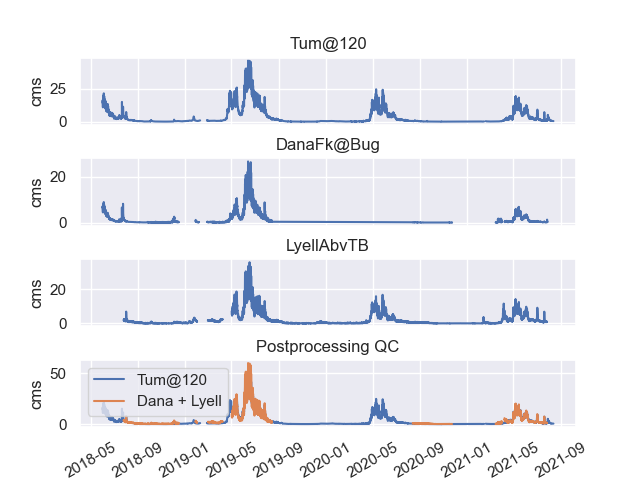

In [5]:
fig, axs = plt.subplots(4, 1, sharex=True)

axs[0].plot(tum_ds)
axs[0].set_title('Tum@120')
axs[0].set_ylabel('cms')

axs[1].plot(dana_ds)
axs[1].set_title('DanaFk@Bug')
axs[1].set_ylabel('cms')

axs[2].plot(lyell_ds)
axs[2].set_title('LyellAbvTB')
axs[2].set_ylabel('cms')

axs[3].plot(tum_ds, label='Tum@120')
axs[3].plot(dana_ds + lyell_ds, label='Dana + Lyell')
axs[3].set_title('Postprocessing QC')
axs[3].set_ylabel('cms')
axs[3].legend()

plt.xticks(rotation=30)
plt.subplots_adjust(hspace=0.5)

<IPython.core.display.Javascript object>


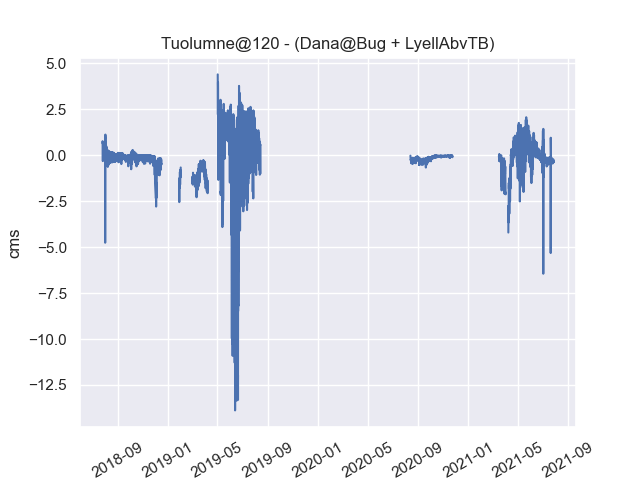

(array([17775., 17897., 18017., 18140., 18262., 18383., 18506., 18628.,
        18748., 18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [6]:
dif_ds = tum_ds - (dana_ds + lyell_ds)

plt.figure()
plt.plot(dif_ds)
plt.ylabel('cms')
plt.title('Tuolumne@120 - (Dana@Bug + LyellAbvTB)')
plt.xticks(rotation=30)